WEB SCRAPPING
==

In [1]:
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd

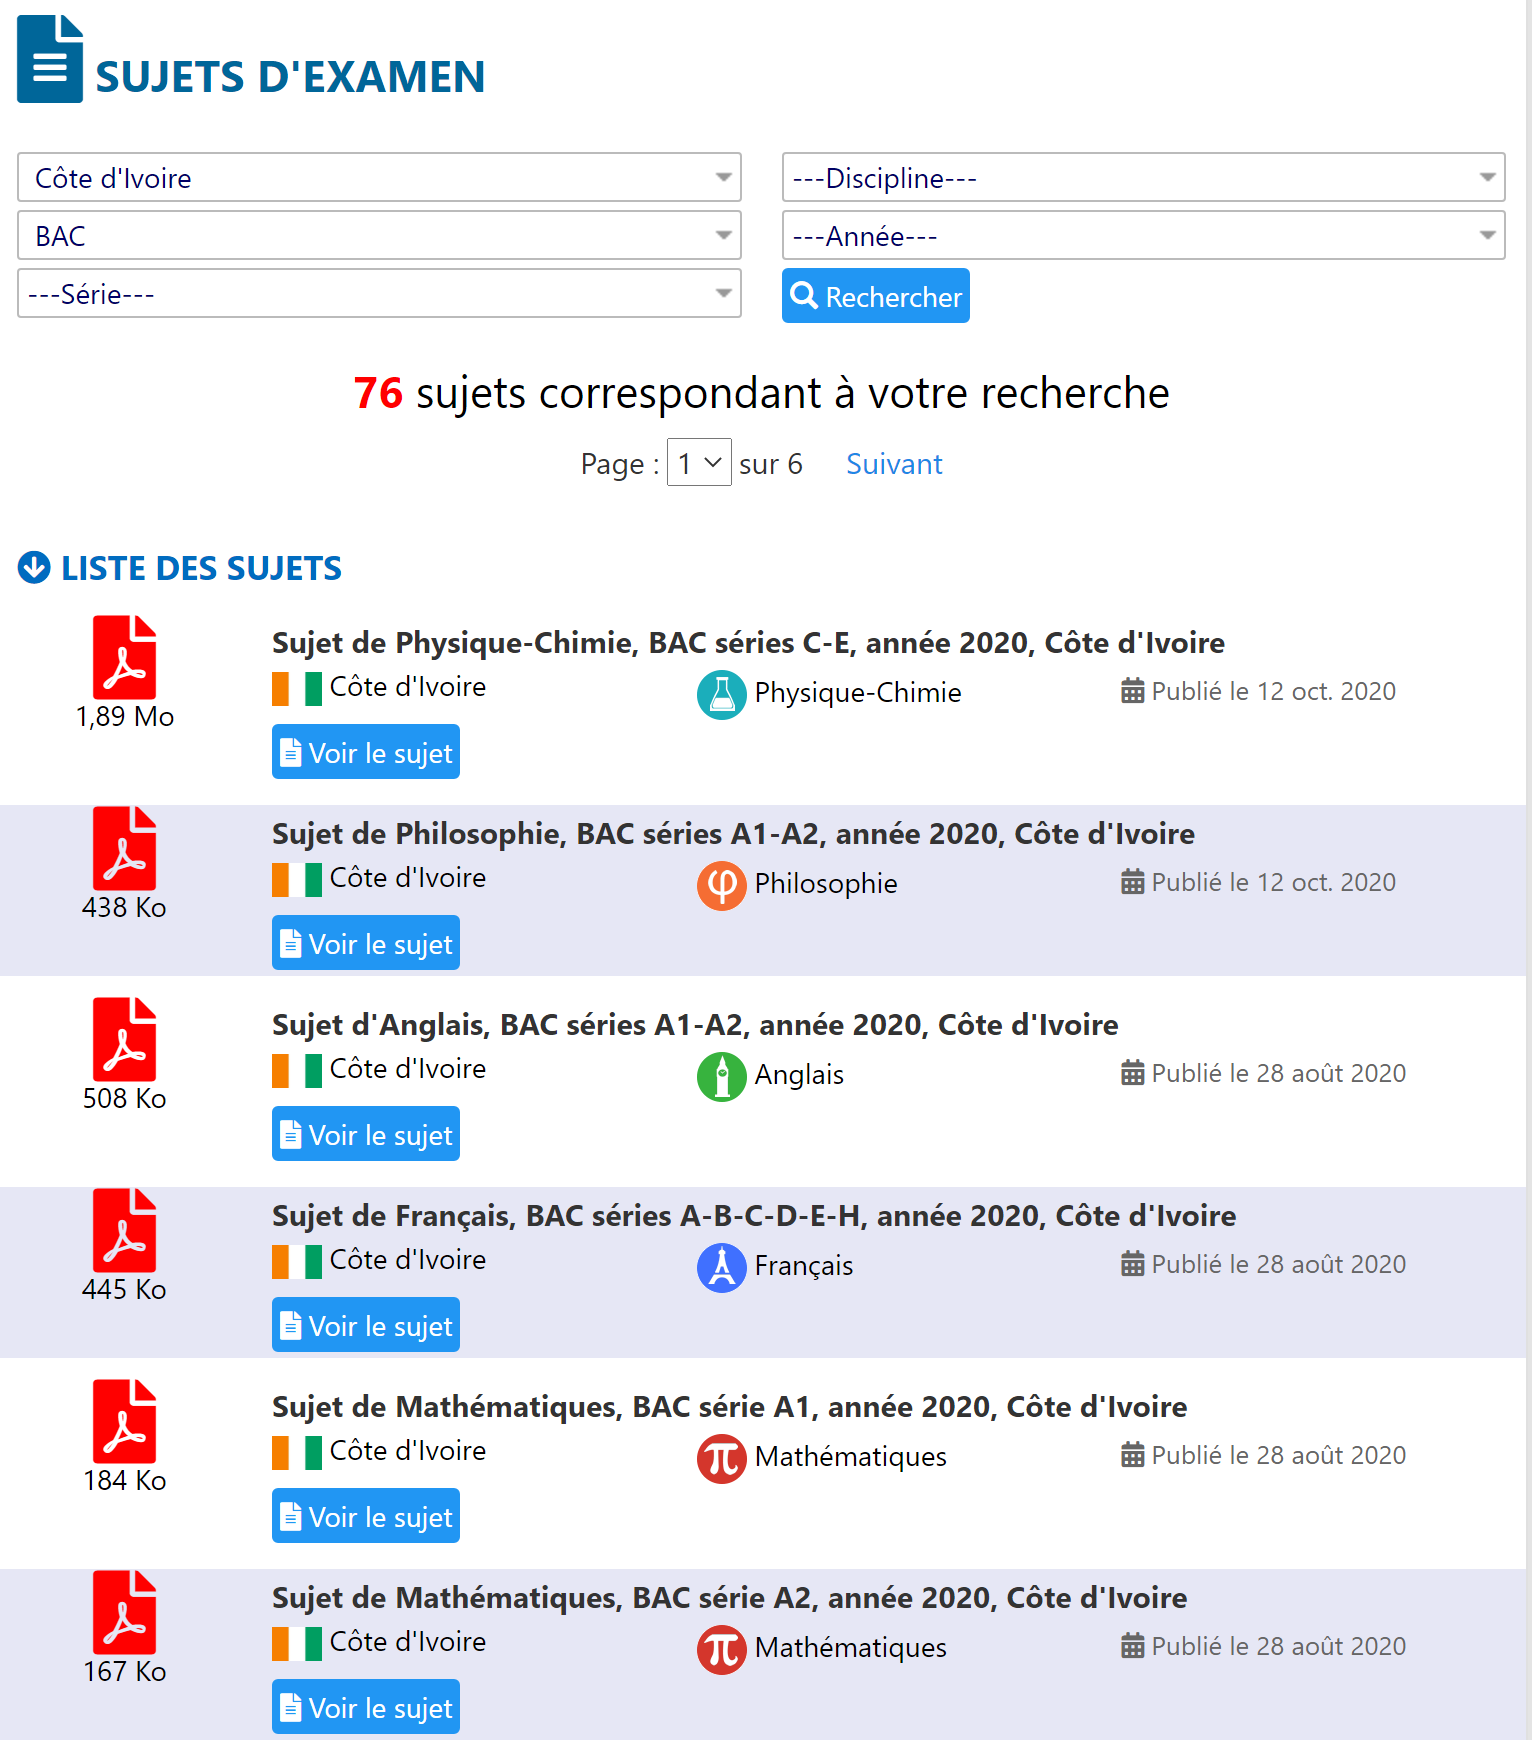

In [2]:
def scrap_web_site(examen:str) -> list:
    
    """
    Cette fonction nous retoune des objets de type list en prenant en entrer une chaîne de caractere clé
    -------------
    Paramètre : Chaine de caractère  rensigant sur la nature de l'examen
    
    Sortie : objet de type list()
        liens -> liens permettant d'accéder au differente page web pour le scrap des données
        matière -> intituler des differentes matière
    -------------
    
    """
    
    liens = []
    matiere = []

    for i in range(0,6):
        scrap = requests.get("http://www.examens-concours.net/sujets_corriges_examen.php?page="+str(i)+"&pays1=CIV&examen1="+examen+"&serie1=&discipline1=&annee1=#liste")
        if scrap.ok:
            soup = BeautifulSoup(scrap.text,'html.parser')
            for c in soup.find_all('div',class_="col-sm-2 text-center sujets_corriges_examens_disciplines_libelle"):
                a = c.find('a')
                lien = 'http://examens-concours.net/'+a['href']
                liens.append(lien)
            for d in soup.find_all('div',class_="col-xs-12 text-left"):
                div = d.find_next('div',class_="col-sm-4 text-left sujets_corriges_examens_disciplines_libelle")
                sujet = div.find_next('div',class_="col-sm-4 text-left sujets_corriges_examens_disciplines_libelle")
                matiere.append(sujet.text)
                
    return liens,matiere

In [3]:
liens,matiere = scrap_web_site("BAC")

In [4]:
len(matiere),len(liens)

(76, 76)

In [5]:
def get_pdf_file(link:list) -> list:
    
    """
    Cette fonction nous retoune une list() en prenant en entrer une autre list() d'éléments clé
    -------------
    Paramètre : list() contenant les differents liens permettant d'accéder aux site web à scrapper
    
    Sortie : objet de type list()
        download_link -> list() contenant les differents lien pour le téléchargement des fichier pdf
    -------------
    
    """

    download_link = []
    for c in link:
        obj = requests.get(c)
        if obj.ok:
            sp = BeautifulSoup(obj.text,'lxml')
            div1 = sp.find('div',class_="col-md-12 text-left")
            div2 = div1.find_next('div',class_="col-md-12 text-left")
            div3 = div2.find_next('div',class_="col-md-12 text-left")
            p1 = div3.find('p')
            p2 = p1.find_next('p')
            download = p2.find('a')
            download_link.append(download['href'])
            
    return download_link

In [6]:
download_link = get_pdf_file(liens)

In [7]:
len(download_link)

76

In [8]:
def last_step(examen: str,link: list) -> list:
    
    """
    Cette fonction nous retoune une list() en prenant en entrer une autre list() d'éléments clé
    -------------
    Paramètre : list() contenant les differents liens permettant d'accéder aux site web à scrapper
    
    Sortie : objet de type list()
        filtre -> list() contenant les differents informations sur les series et zone d'examen
        pays -> list() contenant les differents informations sur le pays concerner
        date -> list() contenant les differents informations sur la session de l'examen
    -------------
    
    """

    titre = []
    for c in link:
        objet = requests.get(c)
        if objet.ok:
            bs = BeautifulSoup(objet.text,'lxml')
            d1 = bs.find('div',class_="col-md-12 text-left sujets_corriges_examens_liste_titre_detail")
            titre.append(d1.text.strip())

    filtre = []
    for c in titre:
        c = c.split(',')[1].split()[-1]
        if len(c) >= 7:
            c = c.replace(c,'Toutes Serie')
        elif c == "C-D-E":
            c = c.replace(c,'Sciences')
        elif c == "A1-A2":
            c = c.replace(c,"A")
        elif c == "C-E":
            c = c.replace(c,"Sciences Dures")
        elif c == "A2-H":
            c = c.replace(c,"A2")
        filtre.append(c)
    
    date = [c.split(',')[-2].split()[-1] for c in titre]
    pays = [c.split(',')[-1] for c in titre]
    types = [examen for i in range(76)]
    return filtre,date,pays,types

In [9]:
filtre,date,pays,types = last_step("BAC",liens)

In [10]:
len(filtre),len(date),len(pays),len(types)

(76, 76, 76, 76)

In [11]:
def write_file(examen: str ,matiere: list,Download_link: list,filtre: list,date: list,pays: list,types: list):
    
    """
    Cette fonction nous permet d'ecrire un fichier ``csv`` pour conserver nos données 
    """
    import pandas as pd
    
    ressource = {
                "Matière":matiere,
                "Sujet": download_link,
                "Serie": filtre,
                "Années": date,
                "Pays": pays,
                "Type": types
                }
    df = pd.DataFrame(ressource)
    df.to_csv("EXAMEN_"+examen+"_File.csv",index=False)

In [12]:
write_file("BAC",matiere,download_link,filtre,date,pays,types)

In [13]:
pd.read_csv("EXAMEN_BAC_File.csv")

,Matière,Sujet,Serie,Années,Pays,Type
0,Physique-Chimie,http://www.examens-concours.net/sujets/RCI-BAC...,Sciences Dures,2020,Côte d'Ivoire,BAC
1,Philosophie,http://www.examens-concours.net/sujets/RCI-BAC...,A,2020,Côte d'Ivoire,BAC
2,Anglais,http://www.examens-concours.net/sujets/RCI-BAC...,A,2020,Côte d'Ivoire,BAC
3,Français,http://www.examens-concours.net/sujets/RCI-BAC...,Toutes Serie,2020,Côte d'Ivoire,BAC
4,Mathématiques,http://www.examens-concours.net/sujets/RCI-BAC...,A1,2020,Côte d'Ivoire,BAC
...,...,...,...,...,...,...
71,Philosophie,http://www.examens-concours.net/sujets/RCI-201...,A,2015,Côte d'Ivoire,BAC
72,Mathématiques,http://www.examens-concours.net/sujets/Bac-D-2...,D,2015,Côte d'Ivoire,BAC
73,Mathématiques,http://www.examens-concours.net/sujets/Bac-A1-...,A1,2015,Côte d'Ivoire,BAC
74,Mathématiques,http://www.examens-concours.net/sujets/Bac-D-2...,D,2014,Côte d'Ivoire,BAC
